In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import ks_2samp


In [2]:
# read the data into data
data=pd.read_csv(r'E:\project\work shop\absenteesim at work\Absenteeism_at_work.csv',sep=';')
data

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264.604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271.219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,...,0,1,2,1,0,2,100,170,35,0


In [3]:
##print dimensionality of the data  , missing values
print("Data dimension :",data.shape)
print("Number of missing values = ",data.isnull().sum().sum())

Data dimension : (740, 21)
Number of missing values =  0


In [4]:
#compute statistics on numerical features
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,740.0,18.017568,11.021247,1.000,9.000,18.000,28.000,36.000
Reason for absence,740.0,19.216216,8.433406,0.000,13.000,23.000,26.000,28.000
Month of absence,740.0,6.324324,3.436287,0.000,3.000,6.000,9.000,12.000
Day of the week,740.0,3.914865,1.421675,2.000,3.000,4.000,5.000,6.000
Seasons,740.0,2.544595,1.111831,1.000,2.000,3.000,4.000,4.000
Transportation expense,740.0,221.329730,66.952223,118.000,179.000,225.000,260.000,388.000
Distance from Residence to Work,740.0,29.631081,14.836788,5.000,16.000,26.000,50.000,52.000
Service time,740.0,12.554054,4.384873,1.000,9.000,13.000,16.000,29.000
Age,740.0,36.450000,6.478772,27.000,31.000,37.000,40.000,58.000
Work load Average/day,740.0,271.490235,39.058116,205.917,244.387,264.249,294.217,378.884


Note that some of the columns, such as Month of absence, Day of the week, 
Seasons, Education, Disciplinary failure, Social drinker, and 
Social smoker, are encoding categorical values. So, we can back-transform the 
numerical values to their original categories so that we have better plotting features. 
We will perform the transformation by defining a Python dict object containing the 
mapping and then applying the apply() function to each feature, which applies the 
provided function to each of the values in the column. First, let's define the encoding 
dict objects:

In [5]:
month_encoding={1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'october',11:'November',12:'December',0:'Unknow'}
day_encoding={2:'Monday',3:'Tuesday',4:'Wednesday',5:'Thursday',6:'Friday'}
season_encoding= {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
education_encoding = {1: "high_school", 2: "graduate", 3: "postgraduate", 4: "master_phd"}
yes_no_encoding = {0: "No", 1: "Yes"}
# backtransform numerical variables to categorical
preprocessed_data=data.copy()
preprocessed_data['Month of absence']=preprocessed_data['Month of absence'].apply(lambda x :month_encoding[x])
preprocessed_data['Day of the week']=preprocessed_data['Day of the week'].apply(lambda x : day_encoding[x])
preprocessed_data['Seasons']=preprocessed_data['Seasons'].apply(lambda x : season_encoding[x])
preprocessed_data['Education']=preprocessed_data['Education'].apply(lambda x : education_encoding[x])
preprocessed_data["Disciplinary failure"] = preprocessed_data["Disciplinary failure"].apply(lambda x: yes_no_encoding[x])
preprocessed_data["Social drinker"] = preprocessed_data["Social drinker"].apply(lambda x: yes_no_encoding[x])
preprocessed_data["Social smoker"] = preprocessed_data["Social smoker"].apply(lambda x: yes_no_encoding[x])

In [6]:
preprocessed_data.head(5)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,July,Tuesday,Spring,289,36,13,33,239.554,...,No,high_school,2,Yes,No,1,90,172,30,4
1,36,0,July,Tuesday,Spring,118,13,18,50,239.554,...,Yes,high_school,1,Yes,No,0,98,178,31,0
2,3,23,July,Wednesday,Spring,179,51,18,38,239.554,...,No,high_school,0,Yes,No,0,89,170,31,2
3,7,7,July,Thursday,Spring,279,5,14,39,239.554,...,No,high_school,2,Yes,Yes,0,68,168,24,4
4,11,23,July,Thursday,Spring,289,36,13,33,239.554,...,No,high_school,2,Yes,No,1,90,172,30,2


Note that only values 1 to 21 represent ICD encoding; values 22 to 28 are separate 
reasons, which do not represent a disease, while value 0 is not defined—hence the 
encoded reason Unknown. As all values contained in the ICD represent some type 
of disease, it makes sense to create a new binary variable that indicates whether the 
current reason for absence is related to some sort of disease or not. We will do this in 
the following exercise.

In [7]:
def isdisease(val):
    return "Yes" if val >= 1 and val <= 21 else "No"
preprocessed_data['Disease']=preprocessed_data['Reason for absence'].apply(isdisease)

<AxesSubplot:xlabel='Disease', ylabel='count'>

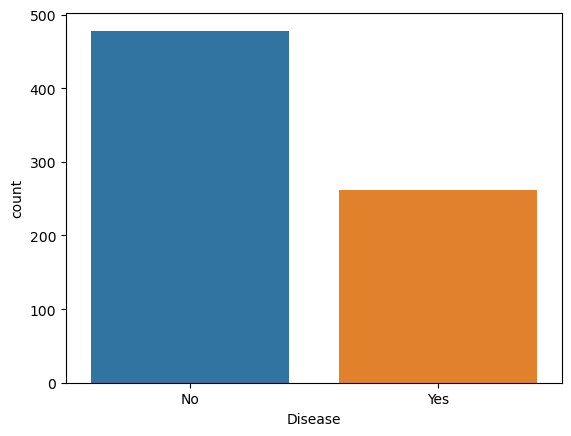

In [8]:
#count
sns.countplot(data=preprocessed_data,x='Disease')

**As we can see, the number of reasons for absence that are not listed in the ICD table is almost twice the number of listed ones**

### Initial Analysis of the Reason for Absence


Text(0, 0.5, 'Number of entries per reason of absence')

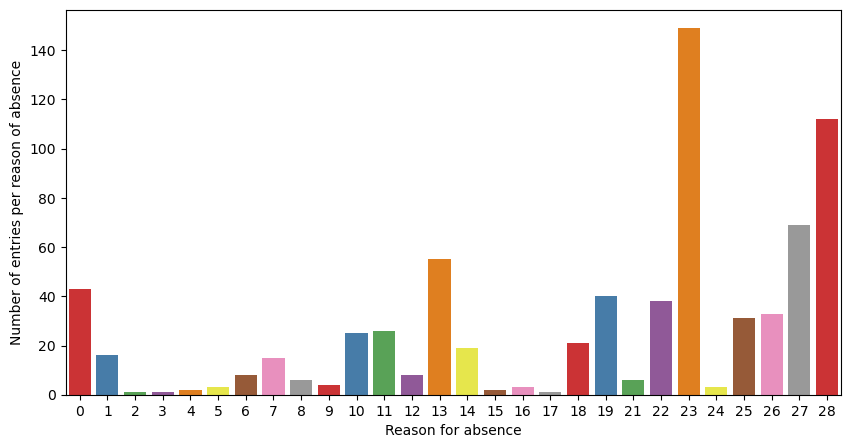

In [9]:
plt.figure(figsize=(10,5))
ax=sns.countplot(data=preprocessed_data,x='Reason for absence',palette='Set1')
ax.set_ylabel('Number of entries per reason of absence')

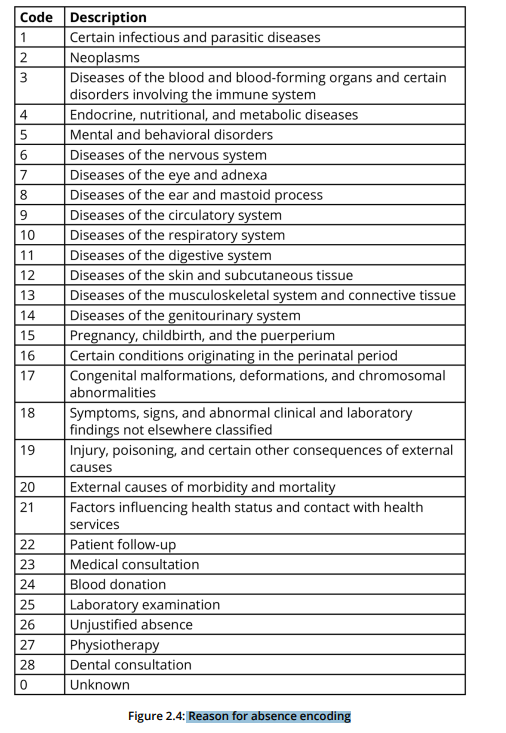

we can assert that the most frequent reasons for absence are related to medical consultations (23), dental consultations (28), and physiotherapy (27). On the other hand, the most frequent reasons for absence encoded in the ICD encoding are related to diseases of the musculoskeletal system and connective tissue (13) and injury, poisoning, and certain other consequences of external causes (19).

In order to perform a more accurate and in-depth analysis of the data, we will investigate the impact of the various features on the Reason for absence and 
Absenteeism in hours columns in the following sections. First, we will analyze the data on **social drinkers and smokers in the next section**

### Analysis of Social Drinkers and Smokers


<AxesSubplot:xlabel='Reason for absence', ylabel='count'>

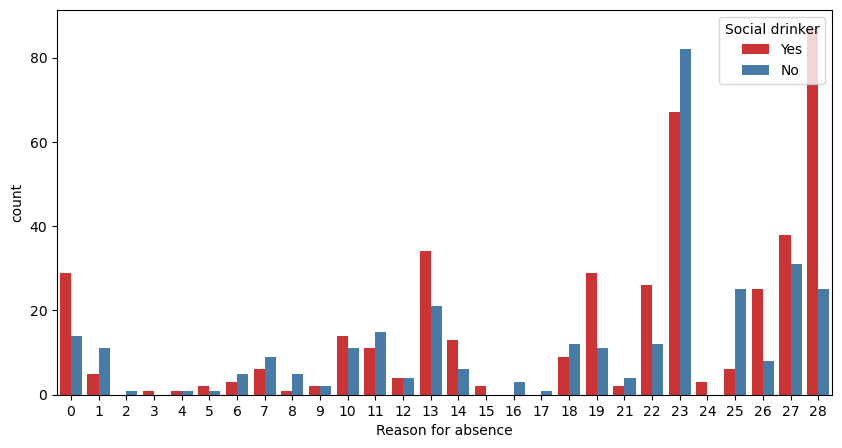

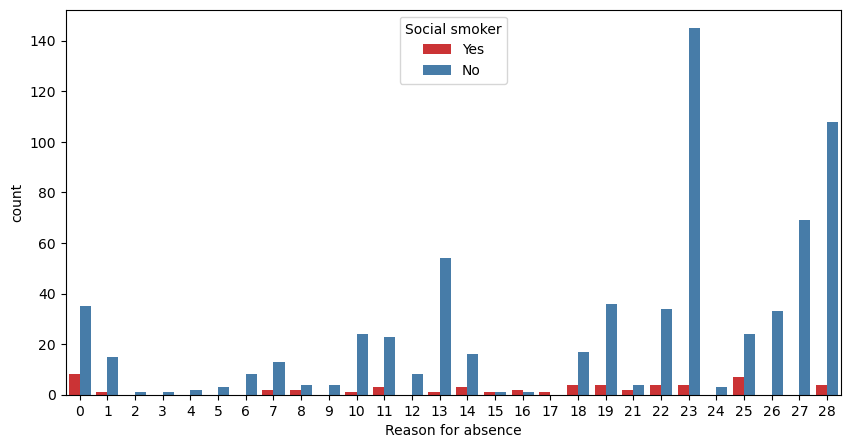

In [10]:
plt.figure(figsize=(10,5))
sns.countplot(data=preprocessed_data,x="Reason for absence",hue="Social drinker",hue_order=['Yes','No'],palette='Set1')
plt.figure(figsize=(10,5))
sns.countplot(data=preprocessed_data,x="Reason for absence",hue="Social smoker",hue_order=['Yes','No'],palette='Set1')

In [11]:
# Next, calculate the actual count for social drinkers and smokers from the preprocessed data:
print('Social drinker')
print(preprocessed_data['Social drinker'].value_counts(normalize=True))   
print('Social smoker')
print(preprocessed_data['Social smoker'].value_counts(normalize=True))   

Social drinker
Yes    0.567568
No     0.432432
Name: Social drinker, dtype: float64
Social smoker
No     0.927027
Yes    0.072973
Name: Social smoker, dtype: float64


As we can see from the resulting plots, a significant difference between drinkers 
and non-drinkers can be observed in absences related to Dental consultations (28). 
Furthermore, as the number of social smokers is quite small (only 7% of the entries), 
it is very hard to say whether there is actually a relationship between the absence 
reasons and smoking. A more rigorous approach in this direction would be to analyze 
the conditional probabilities of the different absence reasons, which are based on 
being a social drinker or smoker.

## Identifying Reasons of Absence with Higher Probability Among Drinkers and Smokers

In [12]:
# compute probabilities of being a drinker and smoker
pro_drinker=preprocessed_data['Social drinker'].value_counts(normalize=True)['Yes']
pro_smoker=preprocessed_data['Social smoker'].value_counts(normalize=True)['Yes']
print(f"P(social drinker)={pro_drinker:.3f} | P(social smoker)={pro_smoker:.3f}")

P(social drinker)=0.568 | P(social smoker)=0.073


###### As you can see, the probability of being a drinker is almost 57%, while the probability of being a smoker is quite low (only 7.3%).


In [13]:
#create mask for social drinkers/smokers
drinker_mask=preprocessed_data['Social drinker']=='Yes'
smoker_mask=preprocessed_data['Social smoker']=='Yes'
# . Compute the total number of entries and the number of absence reasons, masked by drinkers/smokers:
total=preprocessed_data.shape[0]
absence_drinker_prob=preprocessed_data['Reason for absence'][drinker_mask].value_counts()/total
absence_smoker_prob=preprocessed_data[preprocessed_data['Social smoker']=='Yes']['Reason for absence'].value_counts()/total

In [14]:
# compute conditional probabilities
cond_prob=pd.DataFrame(index=range(0,29))
cond_prob["P(Absence | social drinker)"]=absence_drinker_prob/pro_drinker
cond_prob["P(Absence | social smoker)"]=absence_smoker_prob/pro_smoker

Text(0, 0.5, 'conditional probabilities')

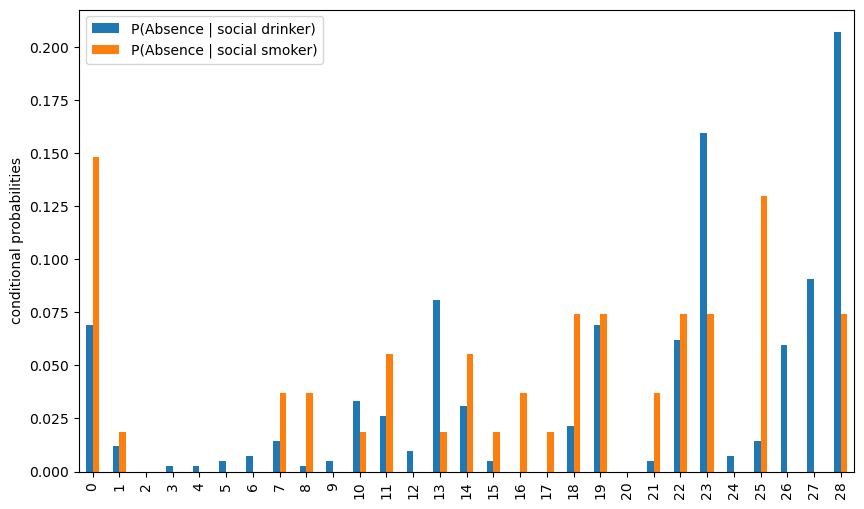

In [15]:
cond_prob.plot.bar(figsize=(10,6))
plt.ylabel('conditional probabilities')

As we can observe from the previous plot, the highest reason for absence for drinkers is dental consultations (28), followed by medical consultations (23). 
Smokers' absences, however, are mostly due to unknown reasons (0) and laboratory examinations (25).

Now, let's apply Bayes' theorem to our dataset in the following exercise. In addition 
to applying Bayes' theorem, we will also be using the Kolmogorov-Smirnov test. The 
Kolmogorov-Smirnov test is used to determine whether two samples are statistically 
different from each other, i.e. whether or not they follow the same distribution. We 
can implement the **Kolmogorov-Smirnov test** directly from SciPy, as we will see in 
the exercise.

### Identifying the Probability of Being a Drinker/Smoker, Conditioned to Absence Reason

In [16]:
absence_prob=preprocessed_data['Reason for absence'].value_counts(normalize=True)
#Now that you have all the necessary values, compute the conditional probabilities according to the equations in Step 1:
cond_prob_drinker_smoker=pd.DataFrame(index=range(0,29))
cond_prob_drinker_smoker['"P(social drinker | Absence)"]']=cond_prob['P(Absence | social drinker)']*pro_drinker/absence_prob
cond_prob_drinker_smoker['"P(social smoker | Absence)"]']=cond_prob['P(Absence | social smoker)']*pro_smoker/absence_prob

Text(0, 0.5, 'Conditional probability')

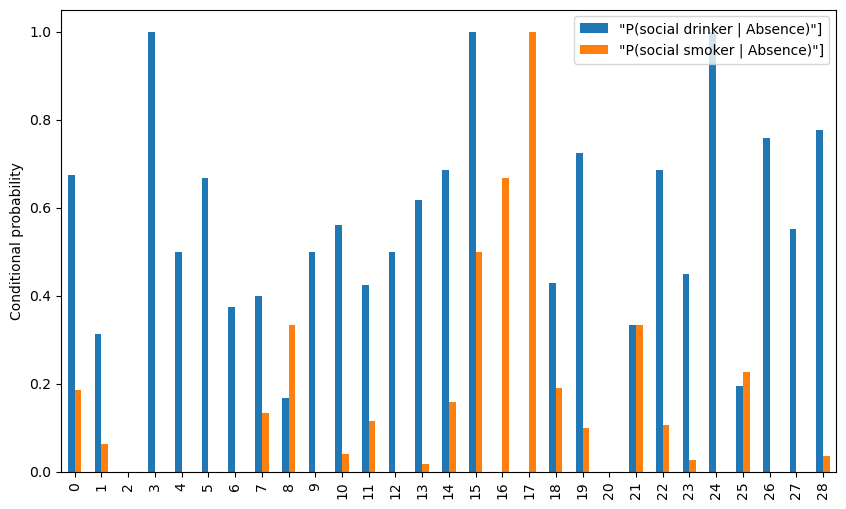

In [17]:
cond_prob_drinker_smoker.plot.bar(figsize=(10,6))
plt.ylabel('Conditional probability')

As you can see from the resulting plot, the conditional probabilities of being a social drinker/smoker are quite high, once an absence with a certain reason occurs. This is due to the fact that the number of entries is very small; as such, if all the registered employees who were absent for a certain reason are smokers, the probability of being a smoker, once that reason has been registered, will be equal to one (based on the available data)

To complete your analysis on the social drinkers and smokers, analyze the 
distribution of the hours of absenteeism based on the two classes (being a 
social drinker/smoker versus not being).

In [18]:
preprocessed_data

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Disease
0,11,26,July,Tuesday,Spring,289,36,13,33,239.554,...,high_school,2,Yes,No,1,90,172,30,4,No
1,36,0,July,Tuesday,Spring,118,13,18,50,239.554,...,high_school,1,Yes,No,0,98,178,31,0,No
2,3,23,July,Wednesday,Spring,179,51,18,38,239.554,...,high_school,0,Yes,No,0,89,170,31,2,No
3,7,7,July,Thursday,Spring,279,5,14,39,239.554,...,high_school,2,Yes,Yes,0,68,168,24,4,Yes
4,11,23,July,Thursday,Spring,289,36,13,33,239.554,...,high_school,2,Yes,No,1,90,172,30,2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,July,Tuesday,Spring,289,36,13,33,264.604,...,high_school,2,Yes,No,1,90,172,30,8,Yes
736,1,11,July,Tuesday,Spring,235,11,14,37,264.604,...,postgraduate,1,No,No,1,88,172,29,4,Yes
737,4,0,Unknow,Tuesday,Spring,118,14,13,40,271.219,...,high_school,1,Yes,No,8,98,170,34,0,No
738,8,0,Unknow,Wednesday,Summer,231,35,14,39,271.219,...,high_school,2,Yes,No,2,100,170,35,0,No


<AxesSubplot:xlabel='Social drinker', ylabel='Absenteeism time in hours'>

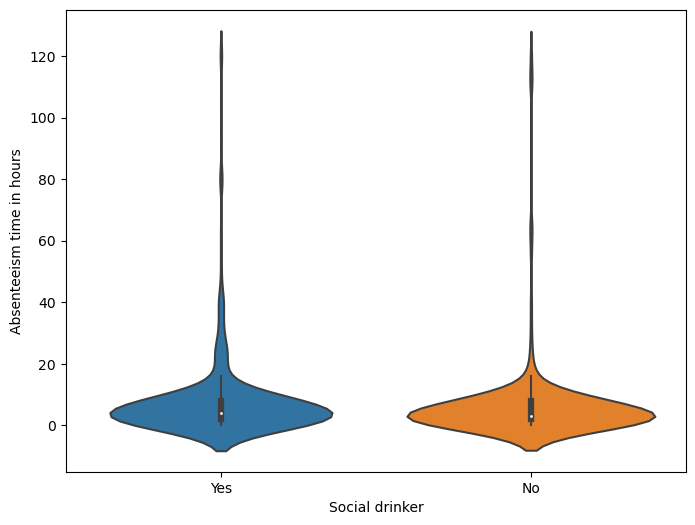

In [19]:
plt.figure(figsize=(8,6))
sns.violinplot(data=preprocessed_data,x='Social drinker',y='Absenteeism time in hours',order=['Yes','No'])

<AxesSubplot:xlabel='Social smoker', ylabel='Absenteeism time in hours'>

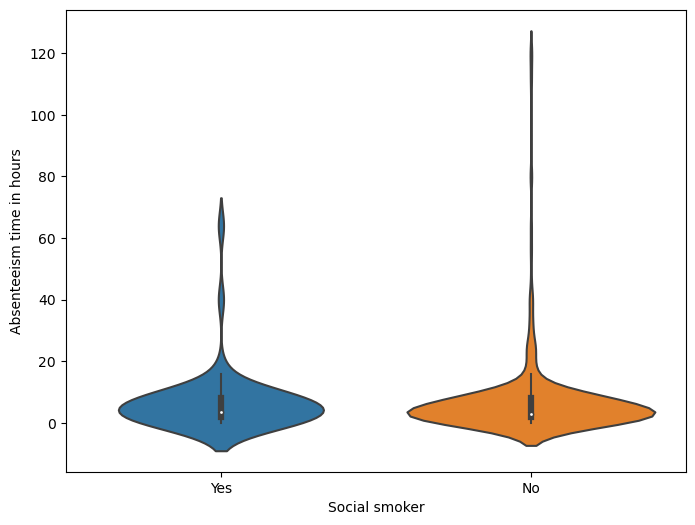

In [20]:
plt.figure(figsize=(8,6))
sns.violinplot(data=preprocessed_data,x='Social smoker',y='Absenteeism time in hours',order=['Yes','No'])

As you can observe from Figure  despite some differences in the outliers 
between smokers and non-smokers, there is no substantial difference in the 
distribution of absenteeism hours in drinkers and smokers. 

To assess this statement in a rigorous statistical way, perform hypothesis testing 
on the absenteeism hours (with a null hypothesis stating that the average 
absenteeism time in hours is the same for drinkers and non-drinkers)

In [21]:
# test mean absenteeism time for drinkers
drinker_mask=preprocessed_data[preprocessed_data['Social drinker']=='Yes']['Absenteeism time in hours']
nodrinker_mask=preprocessed_data[preprocessed_data['Social drinker']=='No']['Absenteeism time in hours']
test=ttest_ind(drinker_mask,nodrinker_mask)
print(f'statistics values : {test[0]:0.3f} , P-value: {test[1] :0.3f}')

statistics values : 1.771 , P-value: 0.077


In [22]:
# test mean absenteeism time for drinkers
smoker_mask=preprocessed_data[preprocessed_data['Social smoker']=='Yes']['Absenteeism time in hours']
nosmoker_mask=preprocessed_data[preprocessed_data['Social smoker']=='No']['Absenteeism time in hours']
test=ttest_ind(smoker_mask,nosmoker_mask)
print(f'statistics values : {test[0]:0.3f} , P-value: {test[1] :0.3f}')

statistics values : -0.243 , P-value: 0.808


As you can see, the p-value of both tests is above the critical value of 0.05, which 
means that you cannot reject the null hypothesis. In other words, you cannot 
say that there is a statistically significant difference in the absenteeism hours 
between drinkers (and smokers) and non-drinkers (and non-smokers)

Note that in the previous paragraph, you performed hypothesis tests, with a 
null hypothesis for the average absenteeism hours being equal for drinkers (and 
smokers) and non-drinkers (and non-smokers). Nevertheless, the average hours 
may still be equal, but their distributions may be different

Perform a **Kolmogorov-Smirnov** test to assess the difference in the distributions 
of two samples:

In [23]:
# perform Kolmogorov-Smirnov test for comparing the distributions
ks_smokers=ks_2samp(smoker_mask,nosmoker_mask)
ks_drinkers=ks_2samp(drinker_mask,nodrinker_mask)
print(f"Drinkers comparison: statistics={ks_drinkers[0]:.3f}, pvalue={ks_drinkers[1]:.3f}")
print(f"Smokers comparison: statistics={ks_smokers[0]:.3f}, pvalue={ks_smokers[1]:.3f}")

Drinkers comparison: statistics=0.135, pvalue=0.002
Smokers comparison: statistics=0.104, pvalue=0.607


The **p-value for the drinkers dataset is lower than the critical 0.05, which is strong 
evidence against the null hypothesis of the two distributions being equal. On the 
other hand, as the p-value for the smokers dataset is higher than 0.05, you cannot 
reject the null hypothesis.**

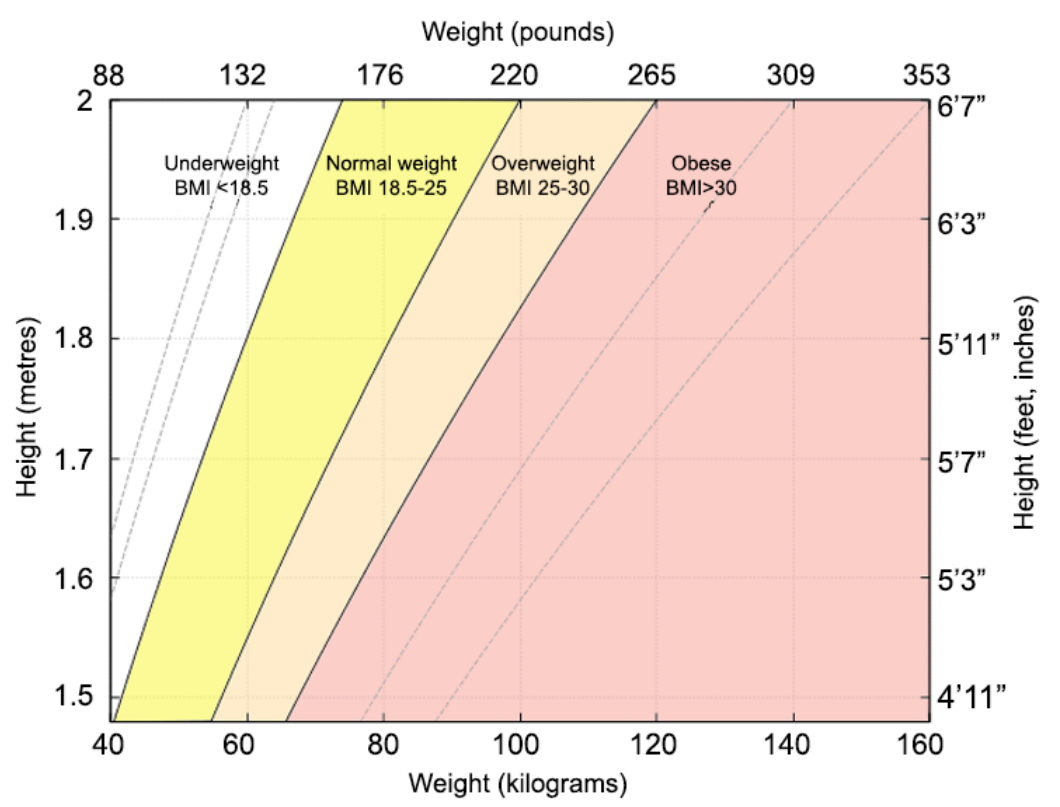

In [24]:
def bmi(x):
    if x < 18.5:
        category = "underweight" 
    elif x >= 18.5 and x < 25:
        category = "healthy weight"
    elif x >= 25 and x < 30:
        category = "overweight"
    else:
        category = "obese"
    return category
preprocessed_data['BMI']=preprocessed_data['Body mass index'].apply(bmi)

<AxesSubplot:xlabel='BMI', ylabel='count'>

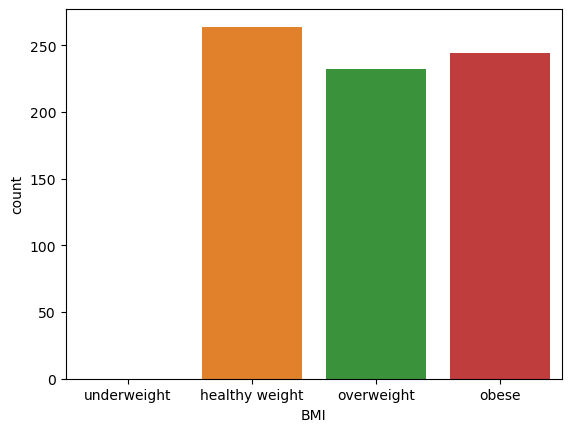

In [25]:
sns.countplot(data=preprocessed_data,x='BMI',order=["underweight", "healthy weight", "overweight", "obese"])

We can see that no entries for the underweight category are present, with the 
data being almost uniformly distributed among the remaining three categories. Of 
course, this is an alarming indicator, as more than 60% of the employees are either 
overweight or obese. 

Text(0.5, 0, 'Number of employees')

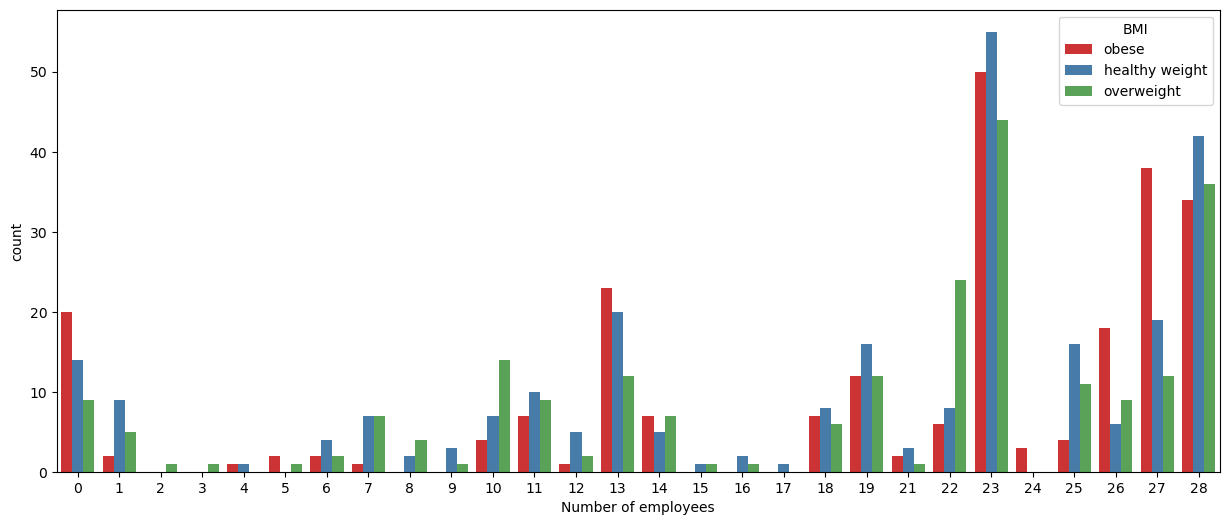

In [38]:
plt.figure(figsize=(15,6))
sns.countplot(data=preprocessed_data,x='Reason for absence',hue='BMI',palette='Set1')
plt.xlabel('Number of employees')

Unfortunately, no clear pattern arises from the preceding plot. In other words, for each reason for absence, an (almost) equal number of employees with different body mass indexes are present.
We can also investigate the distribution of absence hours for the different BMI categories:

<AxesSubplot:xlabel='BMI', ylabel='Absenteeism time in hours'>

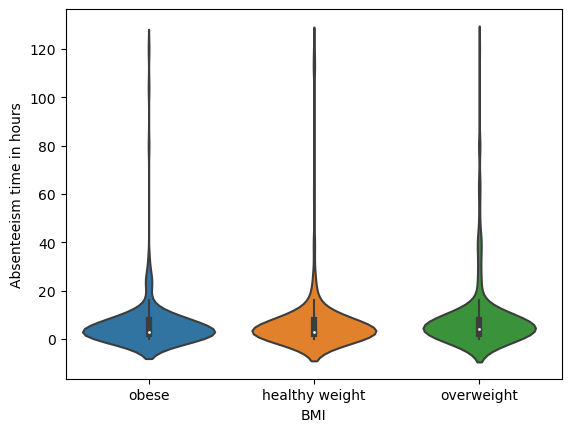

In [39]:
sns.violinplot(data=preprocessed_data,x='BMI',y='Absenteeism time in hours')

As we can observe from Figure  and Figure 2.32, no evidence states that BMI and 
obesity levels influence the employees' absenteeism

### Age and Education Factors
Age and education may also influence employees' absenteeism. For instance, older 
employees might need more frequent medical treatment, while employees with 
higher education degrees, covering positions of higher responsibility, might be less 
prone to being absent.
#### First, let's investigate the correlation between age and absence hours.

Text(0.5, 1.0, 'Correlation = 0.066|P-value=0.074')

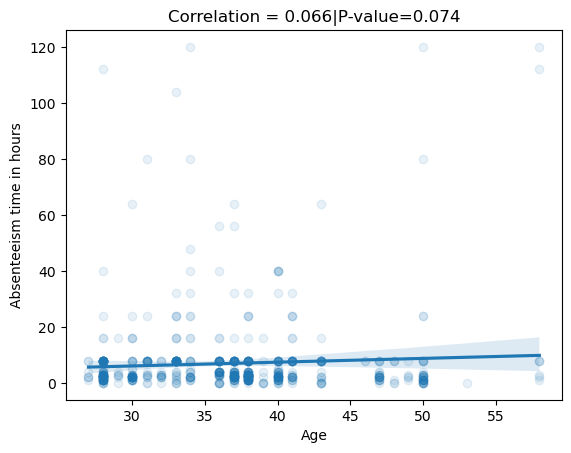

In [40]:
from scipy.stats import pearsonr 
pearson_test=pearsonr(preprocessed_data['Age'],preprocessed_data['Absenteeism time in hours'])
ax = sns.regplot(x="Age", y="Absenteeism time in hours",  data=preprocessed_data, scatter_kws={"alpha":0.1})
ax.set_title(f'Correlation = {pearson_test[0]:0.3f}|P-value={pearson_test[1]:0.3f}')

As we can observe from the resulting plot, no significant pattern occurs. Furthermore, 
the correlation coefficient is extremely small (0.066), and its p-value is above the 
threshold of 0.05, which is an additional indicator that no relationship is present 
between the Age and Absenteeism time in hours features

<AxesSubplot:xlabel='Disease', ylabel='Age'>

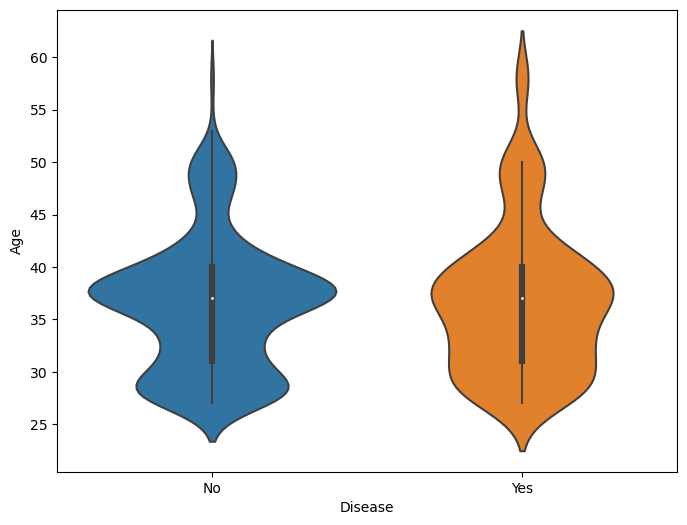

In [41]:
# create violin plot between the Age and Disease columns
plt.figure(figsize=(8,6))
sns.violinplot(x='Disease',y='Age',data=preprocessed_data)


can see some differences between the two distributions of age. 
In fact, for samples with ICD encoded reasons for absence (labeled Yes in the 
Disease column), you can observe that slightly more samples are present for 
older employees. To confirm this difference in distributions, perform hypothesis 
tests on the means and distributions of the two groups:

In [42]:
"""
get Age entries for employees with Disease == Yes and Disease == No
"""
disease=preprocessed_data[preprocessed_data['Disease']=='Yes']['Age']
no_disease = preprocessed_data[preprocessed_data['Disease']=='No']['Age']
# perform hypothesis test for equality of means
test_res=ttest_ind(disease,no_disease)
print(f"Test for equality of means: statistic={test_res[0]:0.3f}, pvalue={test_res[1]:0.3f}")

Test for equality of means: statistic=0.630, pvalue=0.529


In [43]:
ks_res = ks_2samp(disease, no_disease)
print(f"KS test for equality of distributions: statistic={ks_res[0]:0.3f}, pvalue={ks_res[1]:0.3f}")

KS test for equality of distributions: statistic=0.057, pvalue=0.619


From the results of the two tests, you can conclude that there is no statistically 
significant difference between the two distributions. Thus, age is neither an 
indicator for the length of an absence nor for its type

<AxesSubplot:xlabel='Reason for absence', ylabel='Age'>

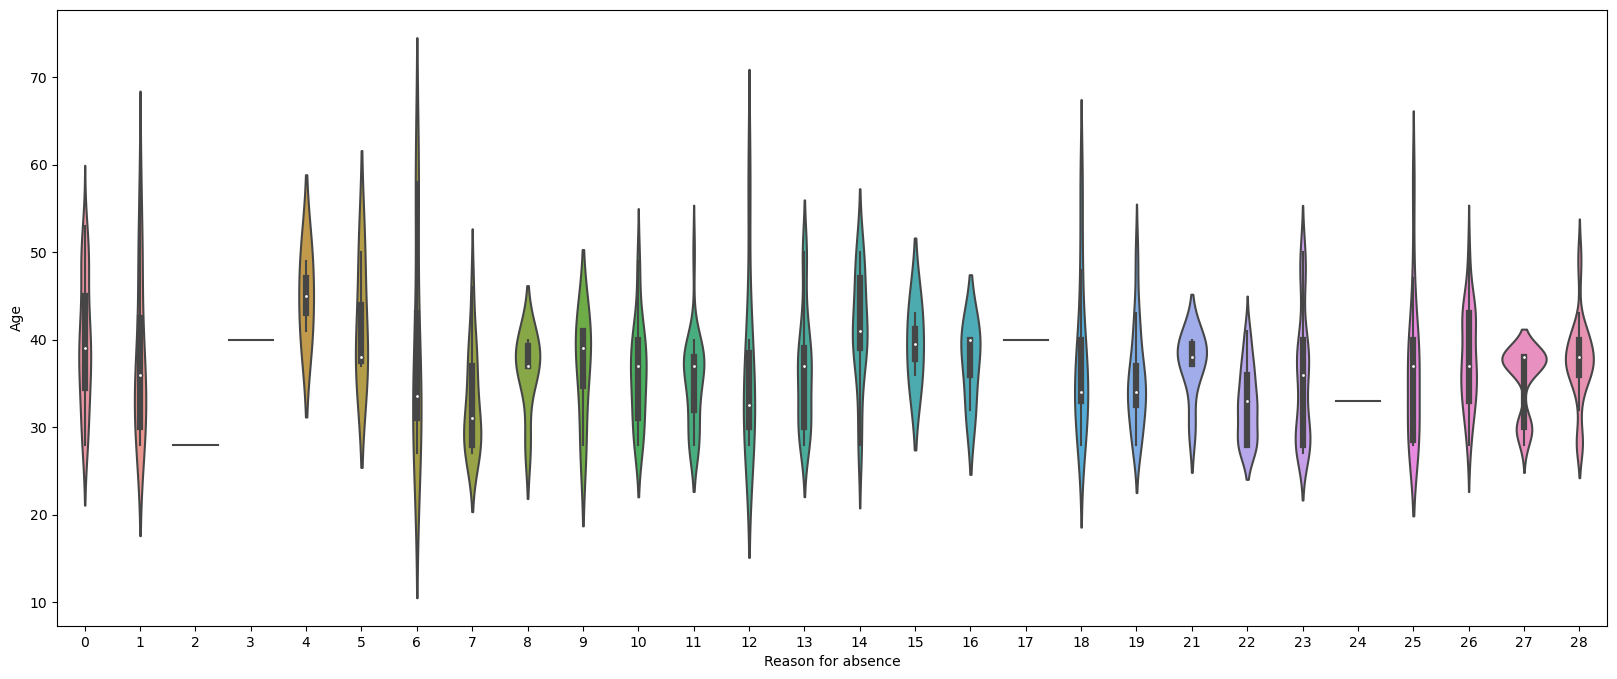

In [44]:
# violin plot of reason for absence vs age
plt.figure(figsize=(20,8))
sns.violinplot(x="Reason for absence", y="Age", data=preprocessed_data)

In light of the previously performed analysis, you can conclude that age has no impact 
on the employees' absenteeism.

### Investigating the Impact of Education on Reason for Absence

In this exercise, you will analyze the existing relationship between the Reason for 
absence and Education columns. You will start by looking at the percentage of 
employees with a certain educational degree, and then relate those numbers to the 
various reasons for absence

In [45]:
education_types= preprocessed_data.Education.unique().tolist()
counts=preprocessed_data['Education'].value_counts()
percentages=preprocessed_data['Education'].value_counts(normalize=True)
for i in education_types:
    print(i ,f'counts {counts[i]} | percentages {percentages[i]*100 : 4.1f}')

high_school counts 611 | percentages  82.6
postgraduate counts 79 | percentages  10.7
graduate counts 46 | percentages  6.2
master_phd counts 4 | percentages  0.5


You can see that most of the employees in the data have a high school degree 
(82.6%), which means that the data is highly biased toward these employees.

<AxesSubplot:xlabel='Education', ylabel='Absenteeism time in hours'>

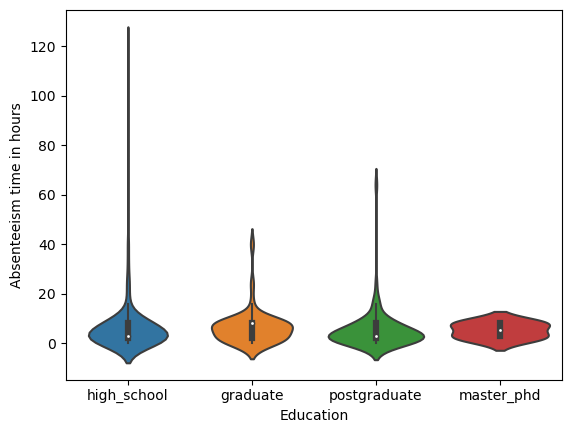

In [46]:
sns.violinplot(x="Education", y="Absenteeism time in hours",data=preprocessed_data,  order=["high_school", "graduate", "postgraduate", "master_phd"])

It seems most of the extreme cases of absence are among employees with lower 
education levels. Compute the mean and standard deviation of the absence 
duration for the different levels of education

In [47]:
for i in education_types:
    mask =preprocessed_data[preprocessed_data['Education']==i]
    hours=mask["Absenteeism time in hours"]
    mean=hours.mean()
    std=hours.std()
    print(f"Education type: {i:12s} | Mean : {mean:.03f} | Stddev: {std:.03f}")

Education type: high_school  | Mean : 7.190 | Stddev: 14.259
Education type: postgraduate | Mean : 5.266 | Stddev: 7.963
Education type: graduate     | Mean : 6.391 | Stddev: 6.754
Education type: master_phd   | Mean : 5.250 | Stddev: 3.202


You can see that both the mean and standard deviation of the hours of absence 
are decreasing, meaning that highly educated employees tend to have shorter 
absences. Of course, a higher degree of education is not a cause for such a 
phenomenon and is more of an indication of it. 

<AxesSubplot:xlabel='count', ylabel='Reason for absence'>

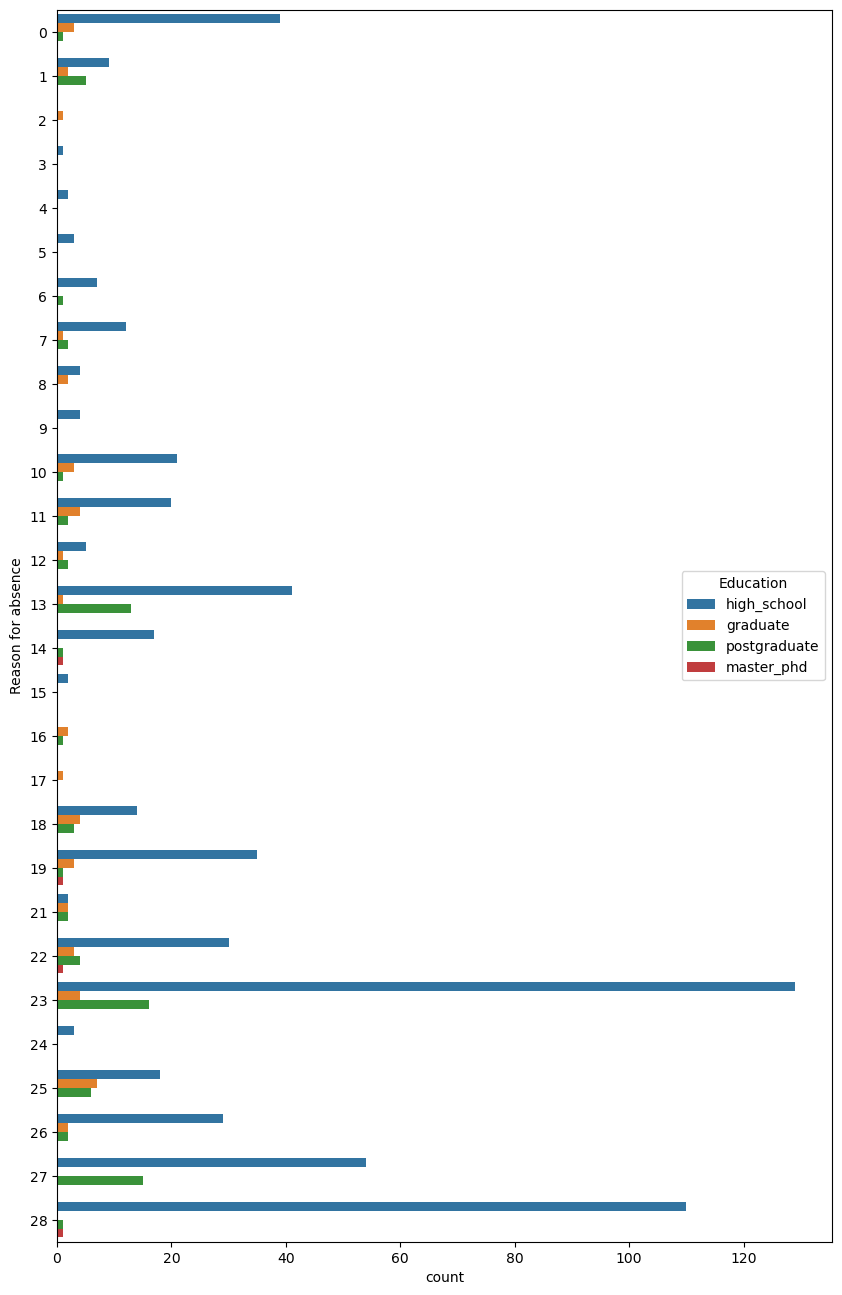

In [48]:
# plot reason for absence, based on education level
plt.figure(figsize=(10, 16))
sns.countplot(data=preprocessed_data, y="Reason for absence",hue="Education", hue_order=["high_school", "graduate", "postgraduate", "master_phd"])

From the preceding plot, you can observe that most of the absences relate to 
employees with a high_school level of education. This is, of course, due to 
the fact that most of the employees only have a high school degree (as observed 
in Step 1). Furthermore, from our analysis in Step 2, we saw that most of the 
absences that consisted of a greater number of hours were among employees 
with a high_school education level.

One question that comes to mind is whether the probability of being absent for 
more than one working week (40 hours) is greater for employees with a high 
school degree compared to graduates.

In [49]:
"""
define threshold for extreme hours of absenteeism and get total number 
of entries
"""
threshold = 40
total_entries = len(preprocessed_data)
# find entries with Education == high_school
high_school_mask = preprocessed_data["Education"] == "high_school"
# find entries with absenteeism time in hours more than threshold
extreme_mask = preprocessed_data["Absenteeism time in hours"] > threshold
# compute probability of having high school degree
prob_high_school = len(preprocessed_data[high_school_mask])/total_entries

In [50]:
# compute probability of having more than high school degree
prob_graduate = len(preprocessed_data[~high_school_mask]) /total_entries
"""
compute probability of having high school and being absent for more 
than "threshold" hours
"""
prob_extreme_high_school = len(preprocessed_data [high_school_mask & extreme_mask])/total_entries
"""
compute probability of having more than high school and being absent 
for more than "threshold" hours
"""
prob_extreme_graduate = len(preprocessed_data [~high_school_mask & extreme_mask])/total_entries
# compute and print conditional probabilities
cond_prob_extreme_high_school = prob_extreme_high_school/prob_high_school
cond_prob_extreme_graduate = prob_extreme_graduate/prob_graduate
print(f"P(extreme absence | degree = high_school) = {100*cond_prob_extreme_high_school:3.2f}")
print(f"P(extreme absence | degree != high_school) =  {100*cond_prob_extreme_graduate:3.2f}")


P(extreme absence | degree = high_school) = 2.29
P(extreme absence | degree != high_school) =  0.78


In [51]:
preprocessed_data.head().T


,0,1,2,3,4
ID,11,36,3,7,11
Reason for absence,26,0,23,7,23
Month of absence,July,July,July,July,July
Day of the week,Tuesday,Tuesday,Wednesday,Thursday,Thursday
Seasons,Spring,Spring,Spring,Spring,Spring
Transportation expense,289,118,179,279,289
Distance from Residence to Work,36,13,51,5,36
Service time,13,18,18,14,13
Age,33,50,38,39,33
Work load Average/day,239.554,239.554,239.554,239.554,239.554


From the preceding computations, we can see that the probability of having an 
absence of more than 40 hours for employees with a high school education degree 
is 2.29%, which is approximately three times greater than the same probability for 
employees with a university degree (0.78%)

### Transportation Costs and Distance to Work Factors

Two possible indicators for absenteeism may also be the distance between home and 
work (the Distance from Residence to Work column) and transportation 
costs (the Transportation expense column). Employees who have to travel 
longer, or whose costs for commuting to work are high, might be more prone 
to absenteeism.

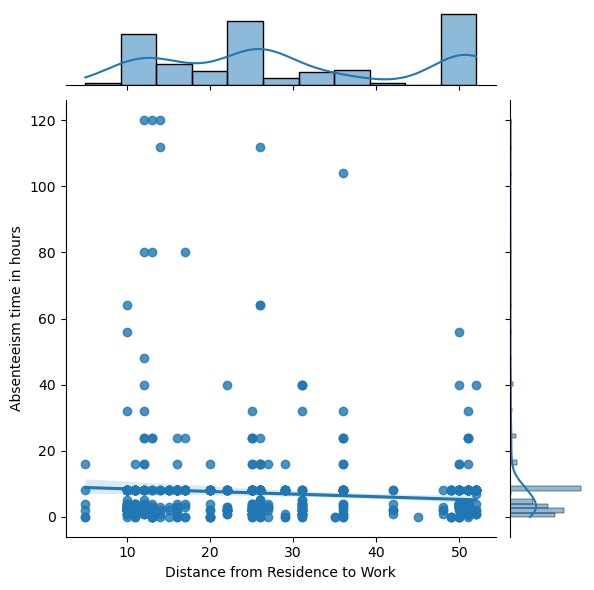

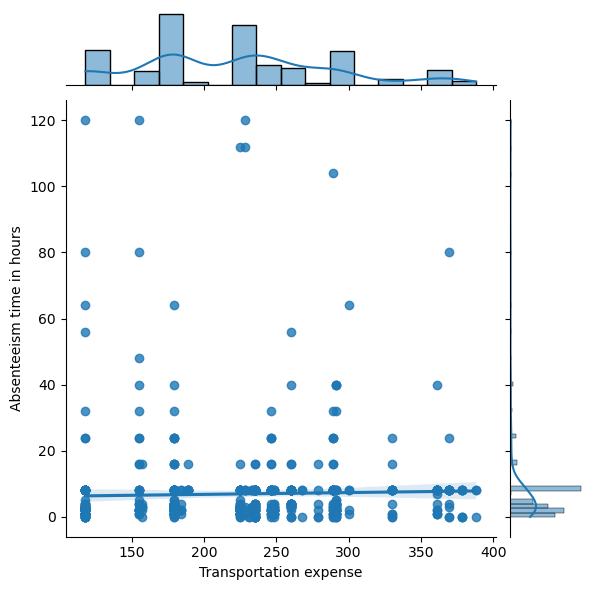

In [52]:
sns.jointplot(x="Distance from Residence to Work", y="Absenteeism time in hours", data=preprocessed_data, kind="reg")
sns.jointplot(x="Transportation expense", y="Absenteeism time in hours", data=preprocessed_data, kind="reg")

As we can see, the distributions of Distance from Residence to Work
and Transportation expense look close to normal distributions, while the 
absenteeism time in hours is heavily right-skewed. This makes the comparison 
between the variables difficult to interpret. One solution to this problem is to 
transform the data into something close to a normal distribution. A handy way to 
perform this transformation is to use the Box-Cox or Yeo-Johnson transformations. 
Both are defined as a family of functions, depending on a parameter λ, under which 
the transformed data is as close to normal as possible.

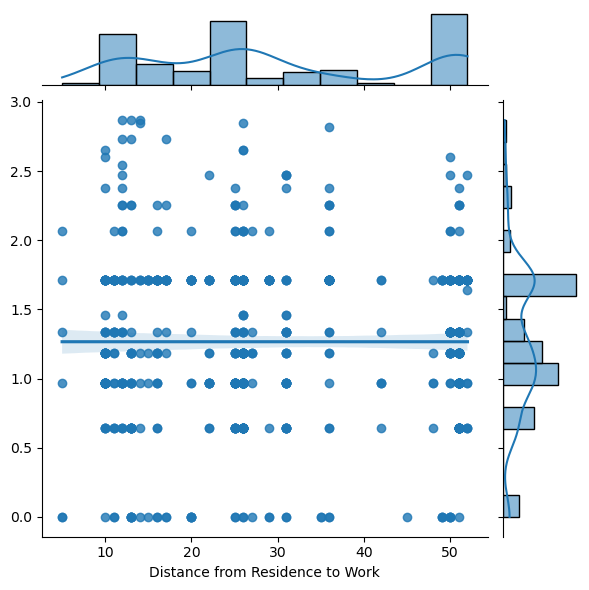

In [53]:
# run Yeo-Johnson transformation and recreate previous plots
from scipy.stats import yeojohnson
hours = yeojohnson(preprocessed_data["Absenteeism time in hours"].apply(float))
distances = preprocessed_data["Distance from Residence to Work"]
expenses = preprocessed_data["Transportation expense"]
ax = sns.jointplot(x=distances, y=hours[0], kind="reg")

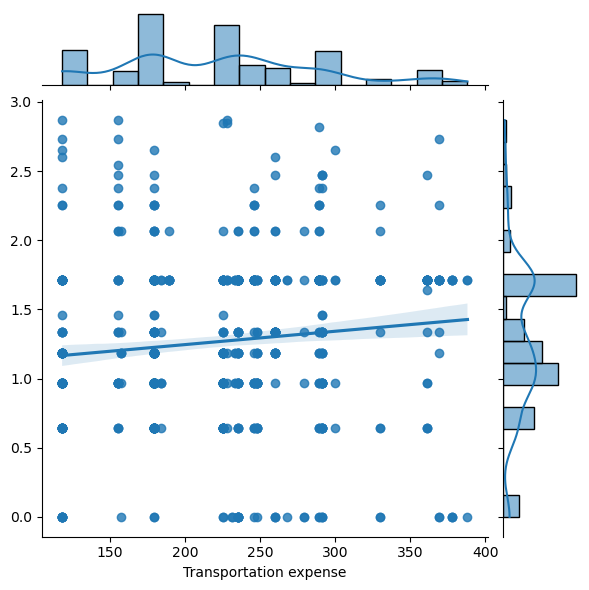

In [54]:
ax = sns.jointplot(x=expenses, y=hours[0], kind="reg")


<Figure size 1000x600 with 0 Axes>

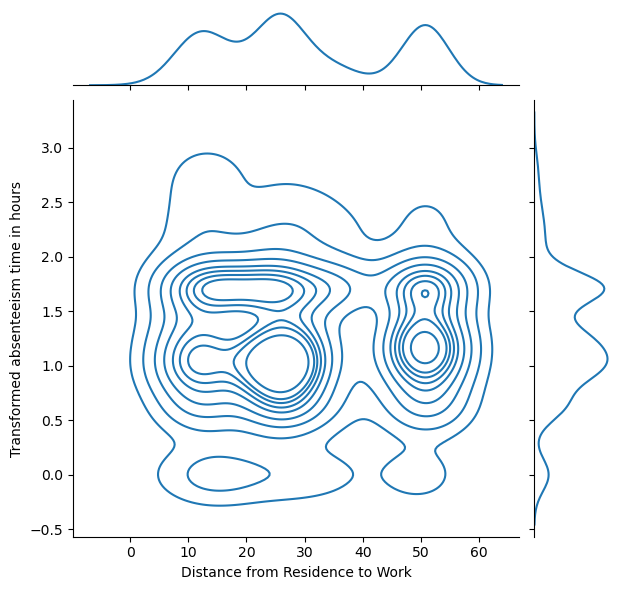

<Figure size 1000x600 with 0 Axes>

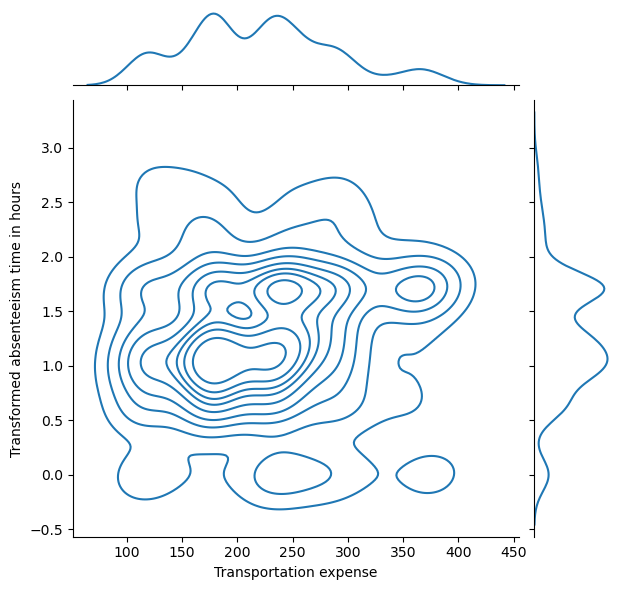

In [55]:
# produce KDE plots 
plt.figure(figsize=(10, 6))
ax = sns.jointplot(x=distances, y=hours[0], kind="kde")
ax.set_axis_labels("Distance from Residence to Work","Transformed absenteeism time in hours")
plt.figure(figsize=(10, 6))
ax = sns.jointplot(x=expenses, y=hours[0], kind="kde")
ax.set_axis_labels("Transportation expense", "Transformed absenteeism time in hours")


From Figure 2.46, we can also see that the regression line between the variables 
is almost flat for the Distance from Residence to Work column (which 
is a clear indicator of zero correlation) but has a slight upward slope for the 
Transportation Expense column. Therefore, we can expect a small 
positive correlation:

In [56]:
distance_corr = pearsonr(hours[0], distances)
expenses_corr = pearsonr(hours[0], expenses)
print(f"Distances correlation: corr={distance_corr[0]:.3f}, \
pvalue={distance_corr[1]:.3f}")
print(f"Expenses comparison: corr={expenses_corr[0]:.3f}, \
pvalue={expenses_corr[1]:.3f}")

Distances correlation: corr=-0.000, pvalue=0.999
Expenses comparison: corr=0.113, pvalue=0.002


### Temporal Factors
Factors such as day of the week and month may also be indicators for absenteeism. 
For instance, employees might prefer to have their medical examinations on Friday 
when the workload is lower, and it is closer to the weekend. In this section, we will 
analyze the impact of the Day of the week and Month of absence columns, 
and their impact on the employees' absenteeism

Text(0.5, 1.0, 'Number of absences per day of the week')

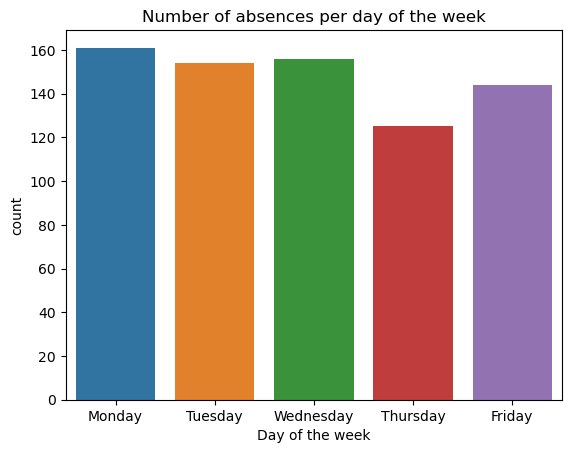

<Figure size 1200x500 with 0 Axes>

In [57]:
ax = sns.countplot(data=preprocessed_data, x='Day of the week', order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"])
plt.figure(figsize=(12, 5))
ax.set_title("Number of absences per day of the week")

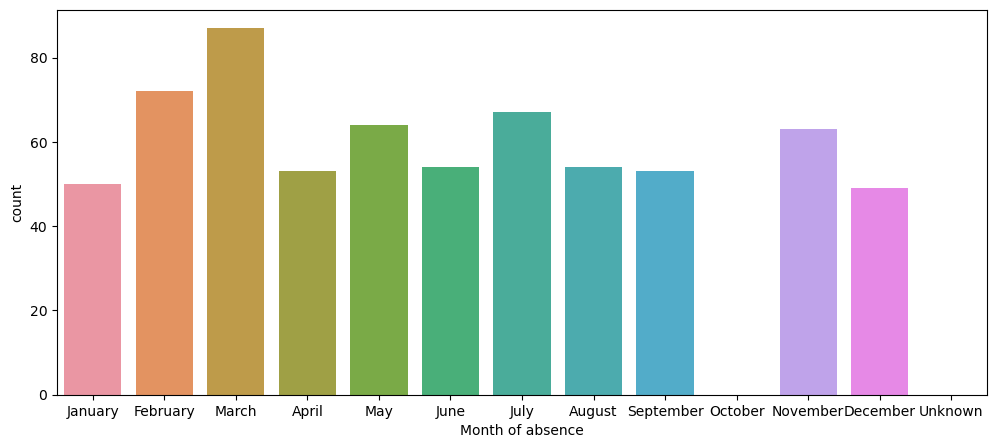

In [58]:
plt.figure(figsize=(12, 5))
ax = sns.countplot(data=preprocessed_data,  x='Month of absence', order=["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December", "Unknown"])

From the preceding plots, we can't really see a substantial difference between 
the different days of the week or months. It seems that fewer absences occur on 
Thursday, while the month with the most absences is March, but it is hard to say that 
the difference is significant.
Now, let's focus on the distribution of absence hours among the days of the week and 
the months of the year. This analysis will be performed in the following exercise

### Investigating Absence Hours, Based on the Day of the Week and the Month of the Year

<AxesSubplot:xlabel='Day of the week', ylabel='Absenteeism time in hours'>

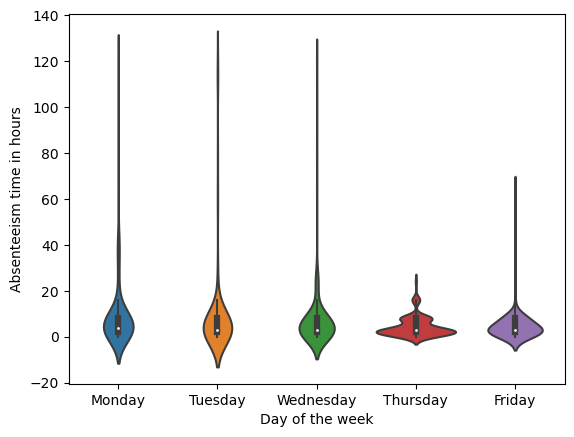

In [59]:
sns.violinplot(x="Day of the week", y="Absenteeism time in hours",data=preprocessed_data, order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"])

<AxesSubplot:xlabel='Month of absence', ylabel='Absenteeism time in hours'>

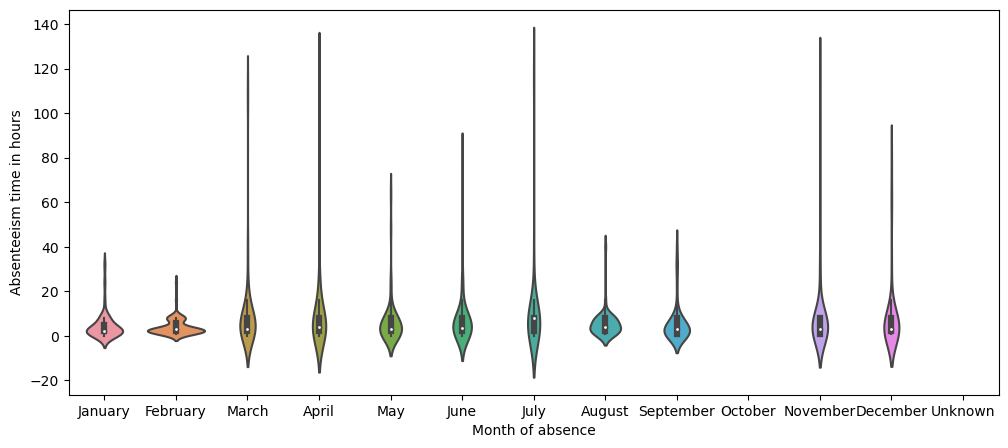

In [60]:
plt.figure(figsize=(12,5))

sns.violinplot(x="Month of absence",  y="Absenteeism time in hours", data=preprocessed_data, order=["January", "February", \
                    "March", "April", "May", "June", "July","August", "September", "October", "November", "December", "Unknown"])

In [61]:
"""
compute mean and standard deviation of absence hours per day of the 
week
"""
dows = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
for dow in dows:
    mask = preprocessed_data["Day of the week"] == dow
    hours = preprocessed_data["Absenteeism time in hours"][mask]
    mean = hours.mean()
    stddev = hours.std()
    print(f"Day of the week: {dow:10s} | Mean : {mean:.03f} | Stddev: {stddev:.03f}")

Day of the week: Monday     | Mean : 9.248 | Stddev: 15.973
Day of the week: Tuesday    | Mean : 7.981 | Stddev: 18.027
Day of the week: Wednesday  | Mean : 7.147 | Stddev: 13.268
Day of the week: Thursday   | Mean : 4.424 | Stddev: 4.266
Day of the week: Friday     | Mean : 5.125 | Stddev: 7.911


In [62]:
"""
compute mean and standard deviation of absence hours per day of the 
month
"""
months = ["January", "February", "March", "April", "May", \
          "June", "July", "August", "September", "October", \
          "November", "December"]
for month in months:
    mask = preprocessed_data["Month of absence"] == month
    hours = preprocessed_data["Absenteeism time in hours"][mask]
    mean = hours.mean()
    stddev = hours.std()
    print(f"Month: {month:10s} | Mean : {mean:8.03f} | Stddev: {stddev:8.03f}")


Month: January    | Mean :    4.440 | Stddev:    5.786
Month: February   | Mean :    4.083 | Stddev:    3.710
Month: March      | Mean :    8.793 | Stddev:   16.893
Month: April      | Mean :    9.094 | Stddev:   18.024
Month: May        | Mean :    6.250 | Stddev:   10.314
Month: June       | Mean :    7.611 | Stddev:   12.359
Month: July       | Mean :   10.955 | Stddev:   21.547
Month: August     | Mean :    5.333 | Stddev:    5.749
Month: September  | Mean :    5.509 | Stddev:    8.407
Month: October    | Mean :      nan | Stddev:      nan
Month: November   | Mean :    7.508 | Stddev:   16.121
Month: December   | Mean :    8.449 | Stddev:   16.049


In [63]:
    # perform statistical test for avg duration difference
thursday_mask = preprocessed_data\
                ["Day of the week"] == "Thursday"
july_mask = preprocessed_data\
            ["Month of absence"] == "July"
thursday_data = preprocessed_data\
                ["Absenteeism time in hours"][thursday_mask]


In [64]:
no_thursday_data = preprocessed_data\
                   ["Absenteeism time in hours"][~thursday_mask]
july_data = preprocessed_data\
            ["Absenteeism time in hours"][july_mask]
no_july_data = preprocessed_data\
               ["Absenteeism time in hours"][~july_mask]
thursday_res = ttest_ind(thursday_data, no_thursday_data)
july_res = ttest_ind(july_data, no_july_data)
print(f"Thursday test result: statistic={thursday_res[0]:.3f}, \
pvalue={thursday_res[1]:.3f}")
print(f"July test result: statistic={july_res[0]:.3f}, \
pvalue={july_res[1]:.3f}")

Thursday test result: statistic=-2.307, pvalue=0.021
July test result: statistic=2.605, pvalue=0.009


<AxesSubplot:>

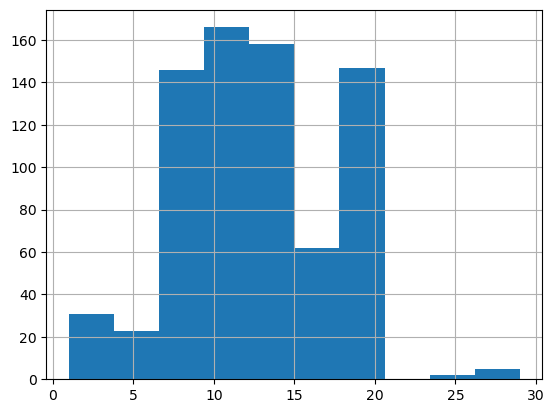

In [65]:
preprocessed_data.head().T
preprocessed_data["Service time"].hist()
